In [6]:
import sympy
import math
import matplotlib.pyplot as plt
x = sympy.symbols('x')
y = sympy.symbols('y')
func = (y**2 + x * y) / x**2
y1 = 1
startX = 1
finishX = 2

In [7]:
def graphic(a, b):
    plt.grid(True)
    plt.plot(a[0], a[1], color = 'red')
    plt.plot(b[0], b[1], color = 'black')
    plt.show()

In [8]:
def rungeKutta(h, arrayX, arrayY):
    for i in range(4):
        k1 = func.subs([(x, arrayX[-1]), (y, arrayY[-1])])
        k2 = func.subs([(x, arrayX[-1] + h / 2), (y, arrayY[-1] + h * k1 / 2)])
        k3 = func.subs([(x, arrayX[-1] + h / 2), (y, arrayY[-1] + h * k2 / 2)])
        k4 = func.subs([(x, arrayX[-1] + h), (y, arrayY[-1] + h * k3)])
        delta = h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        arrayX.append(arrayX[-1] + h)
        arrayY.append(arrayY[-1] + delta)
    return arrayX, arrayY

In [9]:
def adams(h, arrayX, arrayY):
    while (arrayX[-1] <= finishX - 0.000001):
        arrayY.append(arrayY[-1] + h / 24 * (55 * func.subs([(x, arrayX[-1]), (y, arrayY[-1])])
                                            - 59 * func.subs([(x, arrayX[-2]), (y, arrayY[-2])])
                                            + 39 * func.subs([(x, arrayX[-3]), (y, arrayY[-3])])
                                            - 9 * func.subs([(x, arrayX[-4]), (y, arrayY[-4])])))
        arrayX.append(arrayX[-1] + h)
    return arrayX, arrayY

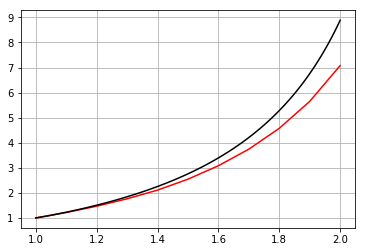

In [10]:
arrayX1 = [startX]
arrayY1 = [y1]
arrayX1, arrayY1 = rungeKutta(h=0.1, arrayX=arrayX1, arrayY=arrayY1)
arrayX1, arrayY1 = adams(h=0.1, arrayX=arrayX1, arrayY=arrayY1)
arrayX2 = [startX]
arrayY2 = [y1]
arrayX2, arrayY2 = rungeKutta(h=0.01, arrayX=arrayX2, arrayY=arrayY2)
arrayX2, arrayY2 = adams(h=0.01, arrayX=arrayX2, arrayY=arrayY2)
a = (arrayX1, arrayY1)
b = (arrayX2, arrayY2)
graphic(a=a, b=b)

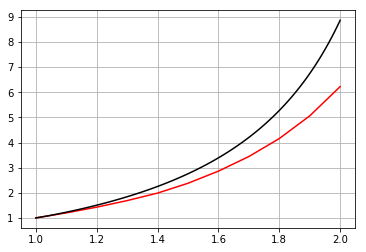

In [16]:
def ey(h, arrayX, arrayY):
    newFunc = []
    for i in range(4):
        newFunc.append(func.subs([(x, arrayX[-1]), (y, arrayY[-1])]))
        arrayX.append(arrayX[-1] + h)
        arrayY.append(arrayY[-1] + newFunc[-1] * h)
    return arrayX, arrayY

barrayX1 = [startX]
barrayY1 = [y1]
barrayX1, barrayY1 = ey(h=0.1, arrayX=barrayX1, arrayY=barrayY1)
barrayX1, barrayY1 = adams(h=0.1, arrayX=barrayX1, arrayY=barrayY1)
barrayX2 = [startX]
barrayY2 = [y1]
barrayX2, barrayY2 = ey(h=0.01, arrayX=barrayX2, arrayY=barrayY2)
barrayX2, barrayY2 = adams(h=0.01, arrayX=barrayX2, arrayY=barrayY2)
a = (barrayX1, barrayY1)
b = (barrayX2, barrayY2)
graphic(a=a, b=b)